In [1]:
import pandas as pd
from requests import get


def get_data(url):
    response = get(url, timeout=15)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()
    

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=wales&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint2 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=england&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint3 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=northern ireland&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )
    endpoint4 = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=nation;areaName=scotland&'
        'structure={"areaname":"areaName","areacode":"areaCode","date":"date","newCases":"newCasesByPublishDate"}'
    )


    data = get_data(endpoint2)
    wales_data = get_data(endpoint)
    N_ireland = get_data(endpoint3)
    scot = get_data(endpoint4)
    #print(data)
    print(wales_data)


{'length': 319, 'maxPageLimit': 2500, 'data': [{'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-16', 'newCases': 892}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-15', 'newCases': 1333}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-14', 'newCases': 933}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-13', 'newCases': 797}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-12', 'newCases': 867}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-11', 'newCases': 928}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-10', 'newCases': 444}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-09', 'newCases': 931}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-08', 'newCases': 744}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-07', 'newCases': 958}, {'areaname': 'Wales', 'areacode': 'W92000004', 'date': '2020-11-06', 'newCases': 1

In [2]:
type(data['data'])

list

In [3]:
Eng_df=pd.DataFrame(data['data'])
wales_df=pd.DataFrame(wales_data['data'])
nireland_df=pd.DataFrame(N_ireland['data'])
scot_df = pd.DataFrame(scot['data'])

In [4]:
scot_df.sort_values(by=['date'])


,areaname,areacode,date,newCases
318,Scotland,S92000003,2020-01-03,0
317,Scotland,S92000003,2020-01-04,0
316,Scotland,S92000003,2020-01-05,0
315,Scotland,S92000003,2020-01-06,0
314,Scotland,S92000003,2020-01-07,0
...,...,...,...,...
4,Scotland,S92000003,2020-11-12,1212
3,Scotland,S92000003,2020-11-13,1357
2,Scotland,S92000003,2020-11-14,1118
1,Scotland,S92000003,2020-11-15,1159


In [5]:
UK_df = pd.concat([scot_df, wales_df, nireland_df,Eng_df], ignore_index = True, sort=False)

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [7]:
from uk_covid19 import Cov19API,api_interface,data_format

# Cases in United Kingdom

In [8]:

cases_and_deaths = {
    "date":"date",
    "newCases":"newCasesByPublishDate",
    "newCumCases":"cumCasesByPublishDate",

    
}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=cases_and_deaths,
    #latest_by="newCasesByPublishDate"
)

data = api.get_json()

print(data)

{'data': [{'date': '2020-11-16', 'newCases': 21363, 'newCumCases': 1390681}, {'date': '2020-11-15', 'newCases': 24962, 'newCumCases': 1369318}, {'date': '2020-11-14', 'newCases': 26860, 'newCumCases': 1344356}, {'date': '2020-11-13', 'newCases': 27301, 'newCumCases': 1317496}, {'date': '2020-11-12', 'newCases': 33470, 'newCumCases': 1290195}, {'date': '2020-11-11', 'newCases': 22950, 'newCumCases': 1256725}, {'date': '2020-11-10', 'newCases': 20412, 'newCumCases': 1233775}, {'date': '2020-11-09', 'newCases': 21350, 'newCumCases': 1213363}, {'date': '2020-11-08', 'newCases': 20572, 'newCumCases': 1192013}, {'date': '2020-11-07', 'newCases': 24957, 'newCumCases': 1171441}, {'date': '2020-11-06', 'newCases': 23287, 'newCumCases': 1146484}, {'date': '2020-11-05', 'newCases': 24141, 'newCumCases': 1123197}, {'date': '2020-11-04', 'newCases': 25177, 'newCumCases': 1099059}, {'date': '2020-11-03', 'newCases': 20018, 'newCumCases': 1073882}, {'date': '2020-11-02', 'newCases': 18950, 'newCumCas

In [9]:
Uk_data = pd.DataFrame(data['data'])

In [10]:
Uk_data.tail()

,date,newCases,newCumCases
314,2020-01-07,0,NaN
315,2020-01-06,0,NaN
316,2020-01-05,0,NaN
317,2020-01-04,0,NaN
318,2020-01-03,0,NaN


In [11]:
Uk_data['newCumCases'] = Uk_data['newCumCases'].fillna(0.0).astype('int')

In [12]:
Uk_data = Uk_data.loc[Uk_data['date']>='2020-02-01'].sort_values(by='date',ascending=True)


In [13]:
Uk_data.loc[Uk_data['date']=='2020-02-01']
dates = ['01 Feb','01 Mar','01 Apr','01 May','01 Jun','01 Jul','01 Aug','01 Sep','01 Oct','01 Nov']

In [34]:
import numpy as np
x = np.array_split(Uk_data['newCases'].to_list(),Uk_data.shape[0]/5)
mylist=[]
for i in range(0,len(x)):
    mylist.append(np.average(x[i]))

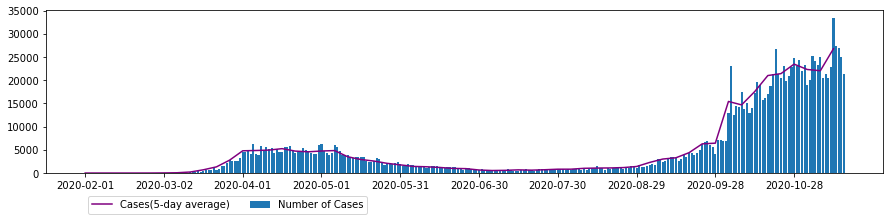

In [59]:
plt.figure(figsize=(15,3))

plt.bar(x=Uk_data['date'], height=Uk_data['newCases'],label='Number of Cases')
plt.xticks(ticks= Uk_data['date'][::30])
plt.plot(Uk_data['date'][::5],mylist,color = 'purple',label='Cases(5-day average)')
plt.legend(ncol=2,bbox_to_anchor=(0.05, -0.25),loc='lower left',borderaxespad=0.)
plt.show()

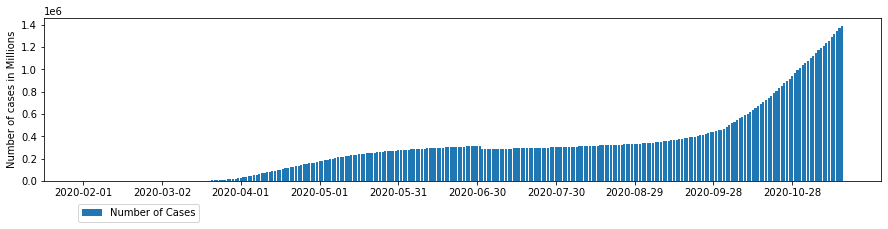

In [62]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_data['date'], height=Uk_data['newCumCases'],label='Number of Cases')
plt.xticks(ticks= Uk_data['date'][::30])
plt.ylabel('Number of cases in Millions')
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.show()

# Deaths in United Kingdom

In [37]:
cases_and_deaths = {
    "date":"date",
    "newDeaths":"newDeaths28DaysByPublishDate",
    "newCumDeaths":"cumDeaths28DaysByPublishDate",

    
}
all_nations = [
    "areaType=overview"
]

api = Cov19API(
    filters=all_nations,
    structure=cases_and_deaths,
    #latest_by="newCasesByPublishDate"
)

data_deaths = api.get_json()

print(data_deaths)

{'data': [{'date': '2020-11-16', 'newDeaths': 213, 'newCumDeaths': 52147}, {'date': '2020-11-15', 'newDeaths': 168, 'newCumDeaths': 51934}, {'date': '2020-11-14', 'newDeaths': 462, 'newCumDeaths': 51766}, {'date': '2020-11-13', 'newDeaths': 376, 'newCumDeaths': 51304}, {'date': '2020-11-12', 'newDeaths': 563, 'newCumDeaths': 50928}, {'date': '2020-11-11', 'newDeaths': 595, 'newCumDeaths': 50365}, {'date': '2020-11-10', 'newDeaths': 532, 'newCumDeaths': 49770}, {'date': '2020-11-09', 'newDeaths': 194, 'newCumDeaths': 49238}, {'date': '2020-11-08', 'newDeaths': 156, 'newCumDeaths': 49044}, {'date': '2020-11-07', 'newDeaths': 413, 'newCumDeaths': 48888}, {'date': '2020-11-06', 'newDeaths': 355, 'newCumDeaths': 48475}, {'date': '2020-11-05', 'newDeaths': 378, 'newCumDeaths': 48120}, {'date': '2020-11-04', 'newDeaths': 492, 'newCumDeaths': 47742}, {'date': '2020-11-03', 'newDeaths': 397, 'newCumDeaths': 47250}, {'date': '2020-11-02', 'newDeaths': 136, 'newCumDeaths': 46853}, {'date': '2020-

In [38]:
Uk_deaths_data = pd.DataFrame(data_deaths['data'])
Uk_deaths_data['newCumDeaths'] = Uk_deaths_data['newCumDeaths'].fillna(0.0).astype('int')
Uk_deaths_data = Uk_deaths_data.loc[Uk_deaths_data['date']>='2020-02-01'].sort_values(by='date',ascending=True)

In [39]:
Uk_deaths_data.head()

,date,newDeaths,newCumDeaths
289,2020-02-01,0,0
288,2020-02-02,0,0
287,2020-02-03,0,0
286,2020-02-04,0,0
285,2020-02-05,0,0


In [49]:

dths = np.array_split(Uk_deaths_data['newDeaths'].to_list(),Uk_deaths_data.shape[0]/5)
mylist2=[]
for i in range(0,len(dths)):
    mylist2.append(np.average(dths[i]))

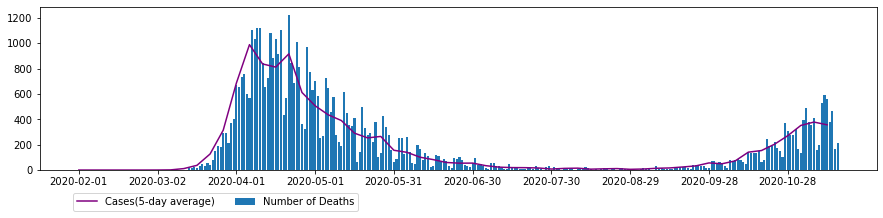

In [65]:
plt.figure(figsize=(15,3))

plt.bar(x=Uk_deaths_data['date'], height=Uk_deaths_data['newDeaths'],label='Number of Deaths')
plt.xticks(ticks= Uk_deaths_data['date'][::30])
plt.plot(Uk_deaths_data['date'][::5],mylist2,color = 'purple',label='Cases(5-day average)')
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.show()

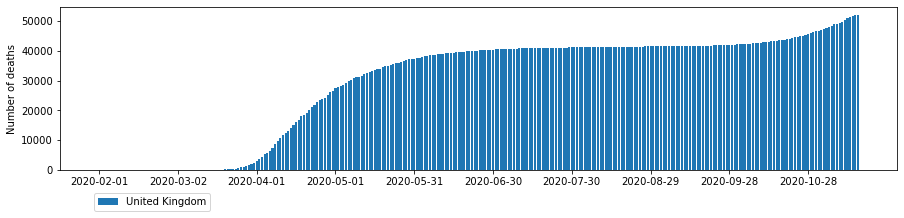

In [61]:
plt.figure(figsize=(15,3))
plt.bar(x=Uk_deaths_data['date'], height=Uk_deaths_data['newCumDeaths'],label='United Kingdom')
plt.xticks(ticks= Uk_deaths_data['date'][::30])
plt.ylabel('Number of deaths')
plt.legend(ncol=2,bbox_to_anchor=(0.04, -0.25),loc='lower left',borderaxespad=0.)
plt.show()